In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from scipy.fft import fft, fftfreq
import warnings
warnings.filterwarnings("ignore")
import copy
import random
import math
import pandas as pd
import csv
import matplotlib.gridspec as gridspec

import scipy.stats as st
df = pd.read_csv('data.csv')
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
Ttrue = df["t"].to_numpy()




In [77]:
temp = 1000
log = []
for i in range(0,1000):
    log.append((temp) / math.log(i + 2))
    
lin = []
for i in range(0,1000):
    lin.append(temp / ((i+1) / 1.45))

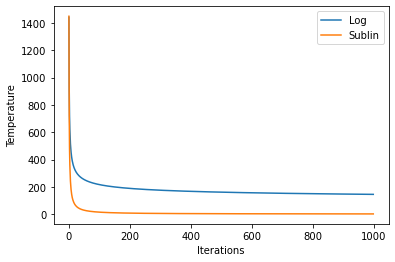

In [78]:
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.plot(log, label="Log")
plt.plot(lin, label="Sublin")
plt.legend()

In [79]:
params = [0.7849444641747256, 0.4344749636562745, 1.3800793819252837, 2.306636386530049]

In [80]:
peak = [1,2,3,4,25,26,27,28,29,30,52,53,54,55,56,57,79,80,81,82,83]
valley = [13,14,15,16,17,18,19,40,41,42,43,44,45,65,66,67,68,69,96,97,98]
side = [4,5,6,7,25,26,27,28,30,31,32,52,53,57,58,59,79,80,83,84,85]
none = []
TOTAL = [peak,side, none]

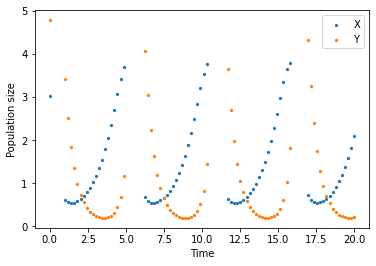

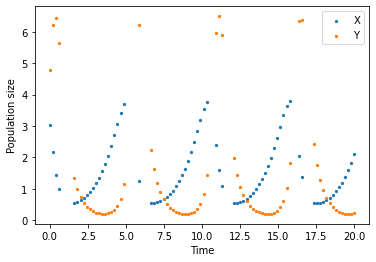

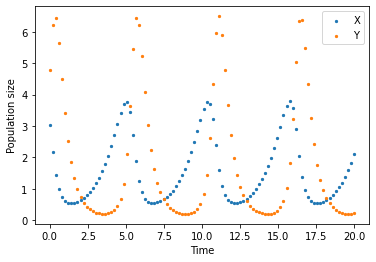

In [81]:
#time_range = 20
#time_run = np.linspace(0, time_range, time_range * 5)
# Parameters
for removes in TOTAL:
    alpha, beta, delta, gamma = params
    time_run = np.linspace(0, 20, 20 * 5)
    Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
    Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
    time_run = [i for j, i in enumerate(time_run) if j not in removes]

    X_first = 3.03525


    Y_first = 4.781635

    def LOTKA_DER(XY, time_run, alpha, beta, delta, gamma):
        X, Y = XY
        dXdt = (alpha * X) - (beta * X * Y)
        dYdt = (delta * X * Y) - (gamma * Y)
        return dXdt, dYdt

    X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(alpha, beta, delta, gamma)).T

    figure = plt.figure(facecolor='w')
    ax = figure.add_subplot()
    ax.scatter(time_run, X, label="X",s=5)
    ax.scatter(time_run, Y, label="Y",s=5)
    plt.xlabel("Time")
    plt.ylabel("Population size")
    legend = ax.legend()

plt.show()

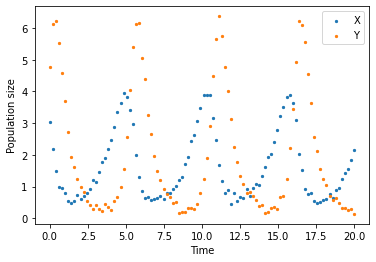

In [83]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
figure = plt.figure(facecolor='w')
ax = figure.add_subplot()
ax.scatter(Ttrue, Xtrue, label="X",s=5)
ax.scatter(Ttrue, Ytrue, label="Y",s=5)
plt.xlabel("Time")
plt.ylabel("Population size")
legend = ax.legend()

plt.show()

In [84]:
from sklearn.metrics import mean_squared_error
def obj_func(true_values, estimated_values): 
    tot = 0
    tot += mean_squared_error(true_values[0],estimated_values[0])
    tot += mean_squared_error(true_values[1],estimated_values[1])
    return tot

obj_func((Xtrue,Ytrue),(X,Y))

0.07164080653866482

In [85]:
from sklearn.metrics import mean_absolute_error
def obj_func2(true_values, estimated_values): 
    tot = 0
    tot += mean_absolute_error(true_values[0],estimated_values[0])
    tot += mean_absolute_error(true_values[1],estimated_values[1])
    return tot


obj_func2((Xtrue,Ytrue),(X,Y))

0.29832548457464536

In [86]:
# alpha beta delta gamma
import random
def newsolution(args):
    for i in range(len(args)):
        args[i] += np.random.normal(0,1)
        if args[i] > 10:
            args[i] = 10
        elif args[i] < 0.1:
            args[i] = 0.1
    return args

newsolution(([1,2,3,4]))

[1.823762319585795, 2.6625599153869177, 2.287476400718929, 3.4018338976760876]

In [87]:
# alpha beta delta gamma
import random
def newsolution2(args):
    bound = 10
    for i in range(len(args)):
        args[i] += np.random.uniform(-0.6,0.6)
        if args[i] > bound:
            args[i] = bound
        elif args[i] < 0.01:
            args[i] = 0.01
    return args

newsolution2(([1,2,3,4]))

[1.1067597471684736, 2.331698438184418, 2.412237051351729, 4.371995751296541]

In [89]:
def hill_climb(start, iterations, Xtrue,Ytrue):
    
    X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(start[0],start[1],start[2],start[3])).T
    old_eval = obj_func((Xtrue,Ytrue), (X,Y))
    old_params = start
    count = 0
    for i in range(iterations):
        cur_params = newsolution2(copy.deepcopy(old_params))
        X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(cur_params[0],cur_params[1],cur_params[2],cur_params[3])).T
        new_eval = obj_func((Xtrue,Ytrue), (X,Y))
        
        if new_eval < old_eval:
            old_params = cur_params
            old_eval = new_eval
            old_x = X
            old_y = Y
            count = 0
            
        count +=1

        if count == 2000:
            return old_eval, old_params, old_x , old_y
        
    return old_eval, old_params, old_x , old_y

bound = 10
start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
error, params, X1, Y1 = hill_climb(start, 20000, Xtrue,Ytrue)

In [24]:
import math
def boltzman(energy, temperature):
    return math.exp(-energy/temperature)


boltzman(2, ((1) / math.log(50000 + 2)))

3.9996800191989737e-10

In [ ]:
def sim_aneal(start, iterations, Xtrue,Ytrue):
    temp = 10
    X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(start[0],start[1],start[2],start[3])).T

    old_eval = obj_func((Xtrue,Ytrue), (X,Y))
    old_params = start
    count = 0
    for i in range(iterations):
        #temp1 = (2) / math.log(i + 2)
        temp1 = temp / ((i+1) / 2)
        cur_params = newsolution2(copy.deepcopy(old_params))
        X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(cur_params[0],cur_params[1],cur_params[2],cur_params[3])).T

        new_eval = obj_func((Xtrue,Ytrue), (X,Y))
        
        if new_eval > 10**100:
            new_eval = 10**40
            
        alpha = boltzman(new_eval-old_eval, temp1)
        U = random.random()
        if alpha >= U:
            old_params = cur_params
            old_eval = new_eval
            old_x = X
            old_y = Y
            count = 0
        
        count +=1

        if count == 5000:
            return old_eval, old_params, old_x , old_y
        
        if i % 1000 == 0:
            print(old_params)
            print(old_eval)
            
    return old_eval, old_params, old_x , old_y

    
start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
error, params, X1, Y1 = sim_aneal(start, 50000, Xtrue,Ytrue)

In [11]:
# [0.7417693663468453, 0.41099740361948844, 1.130036237401377, 2.28943523602261]
# best result of anneal with params normal(0,1) bound = 10, uniform decay of temp

# [0.8501955794236713, 0.48399264154452387, 1.1396941635398523, 2.0455333065061536]
# best result of anneal with params uniform(0.6) bound = 10, uniform decay of temp

In [25]:
# alpha beta delta gamma
import random
def newsolution2(args):
    bound = 10
    for i in range(len(args)):
        args[i] += np.random.uniform(-0.6,0.6)
        if args[i] > bound:
            args[i] = bound
        elif args[i] < 0.01:
            args[i] = 0.01
    return args

newsolution2(([1,2,3,4]))

[1.2022201812501527, 1.763449426970002, 3.4965851081890613, 3.6315284003403185]

In [26]:
def sim_anealX(start, iterations, Xtrue,Ytrue, removes):
    temp = 1000
    X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(start[0],start[1],start[2],start[3])).T
    X = [i for j, i in enumerate(X) if j not in removes]
    #Y = [i for j, i in enumerate(Y) if j not in removes]
    old_eval = obj_func((Xtrue,Ytrue), (X,Y))
    old_params = start
    count = 0
    for k in range(iterations):
        #temp1 = (1) / math.log(i + 2)
        temp1 = temp / ((k+1) / 2)
        cur_params = newsolution2(copy.deepcopy(old_params))
        X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(cur_params[0],cur_params[1],cur_params[2],cur_params[3])).T

        X = [i for j, i in enumerate(X) if j not in removes]
        #Y = [i for j, i in enumerate(Y) if j not in removes]
        new_eval = obj_func((Xtrue,Ytrue), (X,Y))
        
        if old_eval > 10**100:
            old_eval = 10**6
        if new_eval > 10**100:
            new_eval = 10**6
            
        if old_eval < -10**100:
            old_eval = -10**6
        if new_eval < -10**100:
            new_eval = -10**6
            
        alpha = boltzman(new_eval-old_eval, temp1)
        U = random.random()
        if alpha >= U:

            old_params = cur_params
            old_eval = new_eval
            old_x = X
            old_y = Y
            count = 0
        
        count +=1
        
        #if k % 2499 == 0:
           # print(old_params)
           # print(old_eval)
           # print(len(X))
            
    return old_eval, old_params, old_x , old_y

import time

bound = 10
start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]

0.0


In [ ]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()

error_list_onlyx = []

for k in [20,40,60,90]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        time_run = np.linspace(0, 20, 20 * 5)
        removes = random.sample(range(1, 100), k)
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        error, params, X1, Y1 = sim_anealX(start, 20000, Xtrue,Ytrue, removes)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("removex1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_list_onlyx.append(tot/40)
    error_list_onlyx.append(cur_ers)

f = open("removex1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_list_onlyx))
f.close()

In [ ]:
def sim_anealY(start, iterations, Xtrue,Ytrue, removes):
    temp = 1000
    X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(start[0],start[1],start[2],start[3])).T
    #X = [i for j, i in enumerate(X) if j not in removes]
    Y = [i for j, i in enumerate(Y) if j not in removes]
    old_eval = obj_func((Xtrue,Ytrue), (X,Y))
    old_params = start
    count = 0
    for k in range(iterations):
        #temp1 = (1) / math.log(i + 2)
        temp1 = temp / ((k+1) / 2)
        cur_params = newsolution2(copy.deepcopy(old_params))
        X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(cur_params[0],cur_params[1],cur_params[2],cur_params[3])).T

        #X = [i for j, i in enumerate(X) if j not in removes]
        Y = [i for j, i in enumerate(Y) if j not in removes]
        new_eval = obj_func((Xtrue,Ytrue), (X,Y))
        
        if old_eval > 10**10:
            old_eval = 10**6
        if new_eval > 10**10:
            new_eval = 10**6
            
        if old_eval < -10**10:
            old_eval = -10**6
        if new_eval < -10**10:
            new_eval = -10**6
            
        alpha = boltzman(new_eval-old_eval, temp1)
        U = random.random()
        if alpha >= U:

            old_params = cur_params
            old_eval = new_eval
            old_x = X
            old_y = Y
            count = 0
        
        count +=1
            
    return old_eval, old_params, old_x , old_y

import time

bound = 10
start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
start1 = time.time()
error, params, X1, Y1 = sim_anealX(start, 10000, Xtrue,Ytrue, [])
end = time.time()
print(end - start1)

In [ ]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()

error_list_onlyy = []

for k in range[20,40,60,90]:
    tot = 0
    for _ in range(40):
        time_run = np.linspace(0, 20, 20 * 5)
        removes = random.sample(range(1, 100), k)
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        error, params, X1, Y1 = sim_anealY(start, 20000, Xtrue,Ytrue, removes)
        print(len(Ytrue))
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a= obj_func((Xtrue,Ytrue), (X,Y))
        print(a)
        tot += a
    error_list_onlyy.append(tot/40)


In [13]:
def sim_anealXY(start, iterations, Xtrue,Ytrue, time_run):
    temp = 1000
    X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(start[0],start[1],start[2],start[3])).T
    old_eval = obj_func((Xtrue,Ytrue), (X,Y))
    old_params = start
    count = 0
    for k in range(iterations):
        #temp1 = (1) / math.log(i + 2)
        temp1 = temp / ((k+1) / 2)
        cur_params = newsolution2(copy.deepcopy(old_params))
        X, Y = odeint(LOTKA_DER, (3.03525, 4.781635), time_run, args=(cur_params[0],cur_params[1],cur_params[2],cur_params[3])).T

        new_eval = obj_func((Xtrue,Ytrue), (X,Y))
        if old_eval > 10**4:
            old_eval = 10**4
        if new_eval > 10**4:
            new_eval = 10**4
            
        if old_eval < -10**4:
            old_eval = -10**4
        if new_eval < -10**4:
            new_eval = -10**4

        alpha = boltzman(new_eval-old_eval, temp1)
        U = random.random()
        if alpha >= U:
            old_params = cur_params
            old_eval = new_eval
            old_x = X
            old_y = Y
            count = 0
        
        count +=1
        
        #if k % 2499 == 0:
            #print(old_params)
            #print(old_eval)
            #print(len(X))
            
    return old_eval, old_params, old_x , old_y

bound = 10
start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
#error, params, X1, Y1 = sim_anealX(start, 50000, Xtrue,Ytrue, [])

In [ ]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
bound = 10
error_listxy = []

for k in [40,60,90]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        time_run = np.linspace(0, 20, 20 * 5)
        removes = random.sample(range(1, 100), k)
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        time_run = [i for j, i in enumerate(time_run) if j not in removes]
        error, params, X1, Y1 = sim_anealXY(start, 20000, Xtrue,Ytrue, time_run)
        time_run = np.linspace(0, 20, 20 * 5)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("removexy1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_listxy.append(tot/40)
    error_listxy.append(cur_ers)

f = open("removexy1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_listxy))
f.close()

In [ ]:
# Specific points

In [ ]:
# peaks

In [ ]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
bound = 10
error_listxy = []

for k in [1]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        time_run = np.linspace(0, 20, 20 * 5)
        removes = [1,2,3,4,25,26,27,28,29,30,52,53,54,55,56,57,79,80,81,82,83]
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        time_run = [i for j, i in enumerate(time_run) if j not in removes]
        error, params, X1, Y1 = sim_anealXY(start, 20000, Xtrue,Ytrue, time_run)
        time_run = np.linspace(0, 20, 20 * 5)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("removexy1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_listxy.append(tot/40)
    error_listxy.append(cur_ers)

f = open("removexy1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_listxy))
f.close()

In [ ]:
# valleys

In [96]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
bound = 10
error_listxy = []

for k in [1]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        time_run = np.linspace(0, 20, 20 * 5)
        removes = [13,14,15,16,17,18,19,40,41,42,43,44,45,65,66,67,68,69,96,97,98]
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        time_run = [i for j, i in enumerate(time_run) if j not in removes]
        error, params, X1, Y1 = sim_anealXY(start, 20000, Xtrue,Ytrue, time_run)
        time_run = np.linspace(0, 20, 20 * 5)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("removevalley1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_listxy.append(tot/40)
    error_listxy.append(cur_ers)

f = open("removevalley1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_listxy))
f.close()

1
1.5606146244852812
1.485566149193396
3.142845840470789
0.08383854789732308
0.12516269428470955
0.22236591627056346
6.2216381234865565
0.358754288813501
0.30158259681718463
0.32793776207696945
1.0115237474397891
0.1749313107799285
0.26287299471827247
0.8707660482739739
0.10536227283631976
0.33435894024608265
0.1639821684399621
0.301168642772884
4.547772300725863
0.4543929316255235
2.7194295406548354
0.327865317650491
1.6176174449986538
0.1363928600562147
0.3706590985398588
0.34971272399081543
0.08845284772883998
0.06576992700768428
0.11948091904327972
0.03332777456645207
0.06118815719582783
0.38118484851181506
0.15531448647770216
0.5719346284400182
0.20977345314272444
0.16705052214364768
0.15594198422198868
0.14198843091664431
6.576463765964151
0.30531672733350396


In [ ]:
# slopes

In [145]:
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
bound = 10
error_listxy = []

for k in [1]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        time_run = np.linspace(0, 20, 20 * 5)
        removes = [4,5,6,7,25,26,27,28,30,31,32,52,53,57,58,59,79,80,83,84,85]
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        time_run = [i for j, i in enumerate(time_run) if j not in removes]
        error, params, X1, Y1 = sim_anealXY(start, 20000, Xtrue,Ytrue, time_run)
        time_run = np.linspace(0, 20, 20 * 5)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("removemiddle1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_listxy.append(tot/40)
    error_listxy.append(cur_ers)

f = open("removemiddle1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_listxy))
f.close()

1
1.909119043534655
0.1122968540237847
0.4861591490762548
1.2827179587025808
3.2898336152279573
2.0378019634211384
4.777857699227055
0.5933414950349563
0.3734124343159391
3.202885363592866
0.3689917355342748
0.6724496538875564
1.8000035967601644
0.6620834005846564
2.2021618885216236
0.24639208709783433
0.4294494097659244
0.1086460180179846
0.11249717681489356
0.817577792351192
2.217967594127209
0.37006759307307496
0.06416881035199894
1.6381723902490684
0.6388618817177264
0.41024885835595576
0.22107845330184772
0.4689068920306613
0.2186553056374514
0.3756861542847242
2.2749190427237664
0.13715973991453573
0.3941351060995576
0.2529591663649434
0.33763405247646716
0.21269430767980313
0.6842540929194325
0.4974879958667896
0.22083856915419348
0.14000217286234712


In [ ]:
# create data for baseline simulated annealing with 100 sample data points for both predator and prey
Xtrue = df["x"].to_numpy()
Ytrue = df["y"].to_numpy()
bound = 10
error_listxy = []

for k in [1]:
    tot = 0
    cur_ers = []
    print(k)
    for _ in range(40):
        start = [random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound),random.uniform(0,bound)]
        Xtrue = df["x"].to_numpy()
        Ytrue = df["y"].to_numpy()
        time_run = np.linspace(0, 20, 20 * 5)
        removes = []
        Xtrue = [i for j, i in enumerate(Xtrue) if j not in removes]
        Ytrue = [i for j, i in enumerate(Ytrue) if j not in removes]
        time_run = [i for j, i in enumerate(time_run) if j not in removes]
        error, params, X1, Y1 = sim_anealXY(start, 20000, Xtrue,Ytrue, time_run)
        time_run = np.linspace(0, 20, 20 * 5)
        X, Y = odeint(LOTKA_DER, (X_first, Y_first), time_run, args=(params[0],params[1],params[2],params[3])).T
        Xtrue = df["x"].to_numpy(
        Ytrue = df["y"].to_numpy()
        a = obj_func((Xtrue,Ytrue), (X,Y))
        cur_ers.append(a)
        print(a)
        tot += a
    f = open("baseline1000.txt", "a")
    f.write(str(k) + "\n")
    f.write(str(cur_ers))
    f.write("\n")
    f.close()
    error_listxy.append(tot/40)
    error_listxy.append(cur_ers)

f = open("baseline1000.txt", "a")
f.write("\n")
f.write("\n")
f.write(str(error_listxy))
f.close()

In [2]:
def average(list_input):
    return sum(list_input)/len(list_input)


def confidence(data):
    return st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


In [6]:
# loads data for hillcimber optimization with 100 datapoints for both prey and predator 
hillclimber = []
with open("hillclimber_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            hillclimber.append(float(item))

av_hillclimber = average(hillclimber)
ci_hillclimber = confidence(hillclimber)
print(av_hillclimber)
print(ci_hillclimber)


3.9265118498138945
(3.4912777816826632, 4.361745917945125)


sim anneal 


In [7]:
# loads data for simulated annealing using 100 datapoints for both prey and predator 

sim_base = [0.09749003469164481, 0.2274756661607987,0.13016021742610295, 0.4545635211846237, 1.571732713187827, 1.2234070549843725, 0.08856151983854092, 0.7699082900035252, 0.01607688576718734, 0.15875104118676406, 0.07764420106447074, 0.06189099734709267, 0.19311955664484742, 0.0769103368911654, 0.17097700848196498, 0.11526620107155422, 0.0438800301703654, 0.08784984341997709, 0.2153970153438358, 0.12822899507641987, 0.32042621388426895, 2.02944603243623184, 0.3706799369564017, 0.13565246026603545, 0.17490287864675072, 4.1489352941004419, 0.09649654110290143, 0.12657053043407981, 1.09605103746494108, 0.1112252272188836, 0.12834938703663146, 0.0639787352170481, 3.174699676512976, 0.21273366697731177, 1.0972703471749136, 0.1662610694465184, 0.12326589472229005, 0.17996840659395363, 1.1599080964977964, 0.20190775647221554]

av_sim_base = average(sim_base)
ci_sim_base = confidence(sim_base)
print(av_sim_base)
print(ci_sim_base)

0.5257005079776419
(0.24678874594192995, 0.8046122700133536)


In [8]:
# loads data for simulated annealing with removing predator datapoints

y_r20 = []
with open("sim_an_k=20_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            y_r20.append(float(item))


y_r40 = []
with open("sim_an_k=40_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            y_r40.append(float(item))

y_r60 = []
with open("sim_an_k=60_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            y_r60.append(float(item))

y_r90 = []
with open("sim_an_k=90_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            y_r90.append(float(item))

            
            

av_y_r20 = average(y_r20)
av_y_r40 = average(y_r40)
av_y_r60 = average(y_r60)
av_y_r90 = average(y_r90)

ci_y_r20 = confidence(y_r20)
ci_y_r40 = confidence(y_r40)
ci_y_r60 = confidence(y_r60)
ci_y_r90 = confidence(y_r90)


print(av_y_r20)
print(av_y_r40)
print(av_y_r60)
print(av_y_r90)

print(ci_y_r20)
print(ci_y_r40)
print(ci_y_r60)
print(ci_y_r90)

0.6059315627601057
0.6803927462655934
1.1615316089618197
5.715712907010277
(0.33013334112719434, 0.8817297843930165)
(0.2190047513809703, 1.1417807411502165)
(0.46964324601664886, 1.8534199719069897)
(2.79766458169731, 8.633761232323243)


In [15]:
# loads data for simulated annealing with removing prey datapoints


with open("Xsim_an_k=20_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            x_r20.append(float(item))


x_r40 = []
with open("Xsim_an_k=40_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            x_r40.append(float(item))

x_r60 = []
with open("Xsim_an_k=60_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            x_r60.append(float(item))

x_r90 = []
with open("Xsim_an_k=90_t1000_20k.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for item in row:
            x_r90.append(float(item))

            
            

av_x_r20 = average(x_r20)
av_x_r40 = average(x_r40)
av_x_r60 = average(x_r60)
av_x_r90 = average(x_r90)

ci_x_r20 = confidence(x_r20)
ci_x_r40 = confidence(x_r40)
ci_x_r60 = confidence(x_r60)
ci_x_r90 = confidence(x_r90)


print(av_x_r20)
print(av_x_r40)
print(av_x_r60)
print(av_x_r90)


print(ci_x_r20)
print(ci_x_r40)
print(ci_x_r60)
print(ci_x_r90)



0.4971726778356304
0.40626183102939095
0.7417274405312173
1.8082915707174485
(0.249277612331231, 0.7450677433400298)
(0.28192271645783107, 0.530600945600951)
(0.38231962131626895, 1.1011352597461654)
(0.38542554025156184, 3.2311576011833347)


In [10]:
# loads data for simulated annealing with removing both predator and prey datapoints


remove_both = [[0.12846306300128932, 0.32717967306019785, 0.4188277013700987, 0.288888100561547, 3.343418769361471, 1.149932257654586, 0.22134971303233925, 0.2323940855654282, 0.08356611528504933, 0.42426500969363795, 0.22319854174990394, 0.10060165969879575, 0.36195250132913875, 0.3971773447802277, 3.0323243334396217, 0.04155501913664199, 0.45209805571239237, 0.5995323312881307, 0.21768065426930866, 0.02864866988434553, 0.07231159442436005, 0.23282732194848466, 0.15355174141007447, 3.06703251039993, 1.0889676951296379, 0.1148441012950725, 0.35188234406268165, 0.18401174592292174, 0.14508847200911928, 0.11024473818567898, 0.6095529126286681, 0.12670201964422273, 0.21771703244159848, 0.3817118140520561, 0.20271609195392226, 0.1681649371819237, 1.245898572523068, 1.5815824608278555, 0.09610464748132026, 0.3501618009870292], [0.0906828393846652, 0.2710808294946708, 0.5796838100355055, 0.0799856201792852, 1.5061016843831332, 0.16340427644515038, 0.17939390360771815, 1.83406271748701, 0.3626209020929575, 0.1740120519010779, 0.33195362897594594, 0.21931260575151476, 0.2931450320534218, 0.701163195562853, 0.4118738575231561, 0.1900046435394676, 0.12938594380299584, 0.5545037960405209, 0.43078336675335693, 4.295661444931658, 1.4491795137056735, 0.1499275542214601, 3.2768917725699245, 0.4324244183465249, 0.34511688793012607, 8.89803990154573, 0.12374175312847874, 0.07646878675009484, 0.21611669718730248, 0.3383634628379927, 2.68262528056726, 4.634185808321007, 0.09252262797035088, 0.3794729556263471, 0.3103393899109107, 0.10907136987395333, 0.2105429860792749, 3.358111344355189, 1.4284261083827121, 0.13734370443359267],[0.4400303684232928, 9.207620677759733, 0.10062647915054429, 4.560181275812773, 3.150110164185004, 3.2971101540644536, 0.48908619722265145, 0.08428777238897137, 1.0949012001041207, 3.3657818156397097, 0.7637851827623168, 0.18738724690317804, 3.373134534710337, 2.5441289965429723, 0.3833160935799109, 0.2152357467754607, 0.24518990069427443, 1.8507832484686493, 0.2712975361278517, 0.08584101671274698, 0.15995788342653525, 0.22518517766574414, 0.4959067731600676, 0.11420742708206452, 0.35615806058604127, 0.15440653776996285, 0.06989493746172194, 1.6389054200964872, 0.4831345638213367, 0.18860334030595644, 5.766517074443058, 0.16765223844600674, 0.3639168081194965, 0.053053162742596444, 2.7166524386570035, 0.30638772639974776, 1.9428976103497964, 0.1306972132177027, 9.69079788472817, 0.21126326681977758],[7.703045135098551, 4.152174805853345, 0.0807393162509653, 960.4058940084025, 4.2642669609310015, 135.91124087653154, 0.2466437483178762, 0.6073766747851679, 0.7849625955235208, 11.445852449914485, 1.0660752511795641, 12.198574538068744, 0.19162609243714393, 1.182239175276296, 5.81848952610929, 3.2163737446280867, 3.433605471266736, 10.180515949256977, 4.05519038340381, 14.88067766981327, 12.062243327137535, 12.918282027008816, 4.863552132197913, 0.6701506960487327, 5.479604748606665, 11.922199957943334, 38.45325095461837, 3.80831678012165, 12.27602612082848, 74.23485829438592, 9.430689381676492, 10.797543498334084, 0.18268313613576642, 15.757635370110165, 11.132775968216947, 6.9925096245526746, 177.38003475571134, 2.085680668928338, 61.603428126014904, 9.895107347275898]]
r_b20 = remove_both[0]
r_b40 = remove_both[1]
r_b60 = remove_both[2]
r_b90 = remove_both[3]


av_b_r20 = average(r_b20)
av_b_r40 = average(r_b40)
av_b_r60 = average(r_b60)
av_b_r90 = average(r_b90)

ci_b_r20 = confidence(r_b20)
ci_b_r40 = confidence(r_b40)
ci_b_r60 = confidence(r_b60)
ci_b_r90 = confidence(r_b90)

print(av_b_r20)
print(av_b_r40)
print(av_b_r60)
print(av_b_r90)

print(ci_b_r20)
print(ci_b_r40)
print(ci_b_r60)
print(ci_b_r90)

0.5643532038595944
1.036193211842249
1.5236507788332057
41.59430343222256
(0.30169226011141925, 0.8270141476077696)
(0.47972746635347396, 1.5926589573310244)
(0.7801147153988306, 2.2671868422675807)
(-7.4211057634339, 90.60971262787903)


In [11]:
# loads datapoints for simulated annealing with datapoints removed in peaks, middle and valleys

r_valley = [1.5606146244852812, 1.485566149193396, 3.142845840470789, 0.08383854789732308, 0.12516269428470955, 0.22236591627056346, 6.2216381234865565, 0.358754288813501, 0.30158259681718463, 0.32793776207696945, 1.0115237474397891, 0.1749313107799285, 0.26287299471827247, 0.8707660482739739, 0.10536227283631976, 0.33435894024608265, 0.1639821684399621, 0.301168642772884, 4.547772300725863, 0.4543929316255235, 2.7194295406548354, 0.327865317650491, 1.6176174449986538, 0.1363928600562147, 0.3706590985398588, 0.34971272399081543, 0.08845284772883998, 0.06576992700768428, 0.11948091904327972, 0.03332777456645207, 0.06118815719582783, 0.38118484851181506, 0.15531448647770216, 0.5719346284400182, 0.20977345314272444, 0.16705052214364768, 0.15594198422198868, 0.14198843091664431, 6.576463765964151, 0.30531672733350396]
r_middle = [1.909119043534655, 0.1122968540237847, 0.4861591490762548, 1.2827179587025808, 3.2898336152279573, 2.0378019634211384, 4.777857699227055, 0.5933414950349563, 0.3734124343159391, 3.202885363592866, 0.3689917355342748, 0.6724496538875564, 1.8000035967601644, 0.6620834005846564, 2.2021618885216236, 0.24639208709783433, 0.4294494097659244, 0.1086460180179846, 0.11249717681489356, 0.817577792351192, 2.217967594127209, 0.37006759307307496, 0.06416881035199894, 1.6381723902490684, 0.6388618817177264, 0.41024885835595576, 0.22107845330184772, 0.4689068920306613, 0.2186553056374514, 0.3756861542847242, 2.2749190427237664, 0.13715973991453573, 0.3941351060995576, 0.2529591663649434, 0.33763405247646716, 0.21269430767980313, 0.6842540929194325, 0.4974879958667896, 0.22083856915419348, 0.14000217286234712]
r_peaks = [0.7328236613325004, 0.8678120130828109, 2.2686176902505815, 0.0932540950289111, 0.15071824225795352, 128.6188555670932, 0.16808245067132946, 0.6718594043279238, 0.5902470597729321, 0.3313566007885422, 0.5909360659057772, 9.894832616660905, 0.2170969661715219, 0.6238609286562282, 1.3456359714772186, 2.055348859529662, 1.341979901606057, 30.054325414610318, 0.22399970052286217, 0.15427263699013158, 0.6425117058808463, 0.621214204040138, 0.5666328400847509, 10.303792516742288, 0.5621215211277082, 0.3808908043188806, 0.9178925915134057, 1.3568156287990765, 0.6987190337828089, 9.152596723125415, 0.18037959389989072, 0.6350797507549258, 264.22655858455784, 0.1089214922673501, 0.63906211261274, 0.3914164171241067, 0.22778488609298086, 351.20762665001047, 1.13414812534555, 3.033809596405759]

av_r_valley = average(r_valley)
av_r_middle = average(r_middle)
av_r_peaks = average(r_peaks)

ci_r_valley = confidence(r_valley)
ci_r_middle = confidence(r_middle)
ci_r_peaks = confidence(r_peaks)

print(av_r_valley)
print(av_r_middle)
print(av_r_peaks)

print(ci_r_valley)
print(ci_r_middle)
print(ci_r_peaks)



0.9153075840060005
0.9315394128671212
20.699597265630608
(0.40960403272558676, 1.4210111352864143)
(0.5896433817381181, 1.2734354439961242)
(-1.8444948827337697, 43.243689413994986)


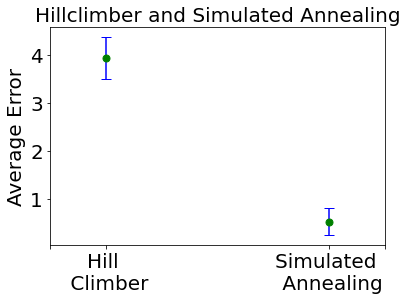

In [12]:
x = [1, 5]
y = [av_hillclimber, av_sim_base]
errors = [abs(av_hillclimber - ci_hillclimber[1]), abs(av_sim_base - ci_sim_base[1])]

plt.figure()
plt.title("Hillclimber and Simulated Annealing",fontsize=20)
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)

plt.ylabel("Average Error", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks((0, 1, 5, 6), ('', 'Hill \n Climber', 'Simulated \n Annealing',''),fontsize=20) 


plt.show()


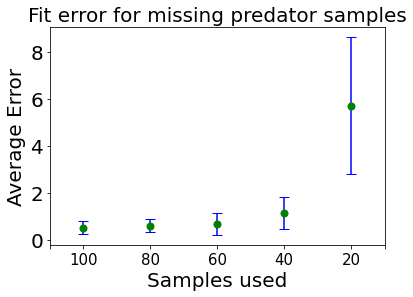

In [13]:
#removing y


x = [1, 3, 5, 7, 9]
y = [av_sim_base, av_y_r20, av_y_r40, av_y_r60, av_y_r90]
errors = [abs(av_sim_base - ci_sim_base[1]), abs(av_y_r20 - ci_y_r20[1]), abs(av_y_r40 - ci_y_r40[1]), abs(av_y_r60 - ci_y_r60[1]), abs(av_y_r90 - ci_y_r90[1])]

plt.figure()
plt.title("Fit error for missing predator samples",fontsize=20)
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)

plt.ylabel("Average Error", fontsize=20)
plt.xlabel("Samples used", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 5, 7, 9, 10), ('', '100', '80', '60', '40', '20',''),fontsize=15) 


plt.show()

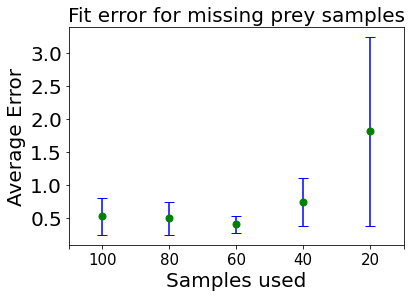

In [16]:
#removing x


x = [1, 3, 5, 7, 9]
y = [av_sim_base, av_x_r20, av_x_r40, av_x_r60, av_x_r90]
errors = [abs(av_sim_base - ci_sim_base[1]), abs(av_x_r20 - ci_x_r20[1]), abs(av_x_r40 - ci_x_r40[1]), abs(av_x_r60 - ci_x_r60[1]), abs(av_x_r90 - ci_x_r90[1])]

plt.figure()
plt.title("Fit error for missing prey samples",fontsize=20)
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)

plt.ylabel("Average Error", fontsize=20)
plt.xlabel("Samples used", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 5, 7, 9, 10), ('', '100', '80', '60', '40', '20',''),fontsize=15) 


plt.show()

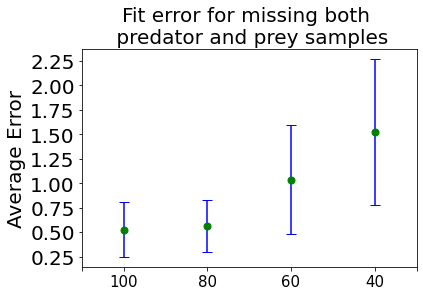

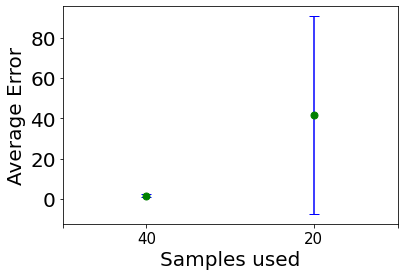

In [181]:
#removing both


x = [1, 3, 5, 7]
y = [av_sim_base, av_b_r20, av_b_r40, av_b_r60]
errors = [abs(av_sim_base - ci_sim_base[1]), abs(av_b_r20 - ci_b_r20[1]), abs(av_b_r40 - ci_b_r40[1]), abs(av_b_r60 - ci_b_r60[1])]

plt.figure()
plt.title("Fit error for missing both \n predator and prey samples",fontsize=20)
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)

plt.ylabel("Average Error", fontsize=20)

plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 5, 7, 8), ('', '100', '80', '60', '40',''),fontsize=15) 


plt.show()

#removing both

x = [1, 3]
y = [av_b_r60, av_b_r90]
errors = [abs(av_b_r60 - ci_b_r60[1]), abs(av_b_r90 - ci_b_r90[1])]

plt.figure()

plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)
plt.xlabel("Samples used", fontsize=20)
plt.ylabel("Average Error", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 4), ('','40', '20',''),fontsize=15) 


plt.show()

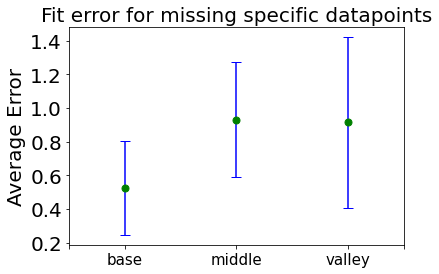

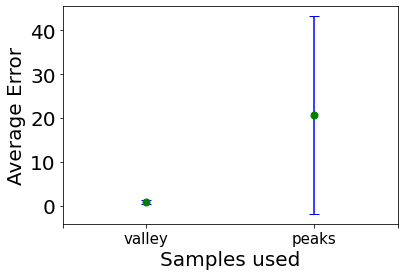

In [17]:
#removing both


x = [1, 3, 5]
y = [av_sim_base, av_r_middle, av_r_valley]
errors = [abs(av_sim_base - ci_sim_base[1]), abs(av_r_middle - ci_r_middle[1]), abs(av_r_valley - ci_r_valley[1])]

plt.figure()
plt.title("Fit error for missing specific datapoints",fontsize=20)
plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)

plt.ylabel("Average Error", fontsize=20)

plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 5, 6), ('', 'base', 'middle', 'valley', ''),fontsize=15) 


plt.show()

#removing both

x = [1, 3]
y = [av_r_valley, av_r_peaks]
errors = [abs(av_r_valley - ci_r_valley[1]), abs(av_r_peaks - ci_r_peaks[1])]

plt.figure()

plt.errorbar(x, y, yerr=errors, fmt = 'o', color = 'g', ecolor = 'b', capsize = 5, markersize = 7)
plt.xlabel("Samples used", fontsize=20)
plt.ylabel("Average Error", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks((0, 1, 3, 4), ('','valley', 'peaks',''),fontsize=15) 


plt.show()